# Chapter 2: Simple Linear Regression

In [1]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## 2.1 Introduction & Motivation

In Data Science, one of the most fundamental problems is that of Supervised Learning. In Supervised Learning, we are trying to find a relationship between a dependent variable (y) and one or more independent variables (x). If the fitted model is cool, it can allow us to predict the value of y, given any values for x. 

In the most simple case, we are dealing with all continuous variables which have a linear relationship. The continuity requirement is especially important for the dependent variable. In essence, the variable should be able to take on any values. A good example of this is temperature or earnings. The second requirement refers to the kind of relationship there exists between the variables. We'll take more about this later. This setup is called the Simple Linear Regression Setup, and will allow us to efficiently fit a Linear Regression Model.

## 2.2 Problem Setting

The Simple Linear Regression Setup exists when we are trying to relate 2 (or more) variables together. Linear Regression however only allows us to search for linear patterns in data. For example:

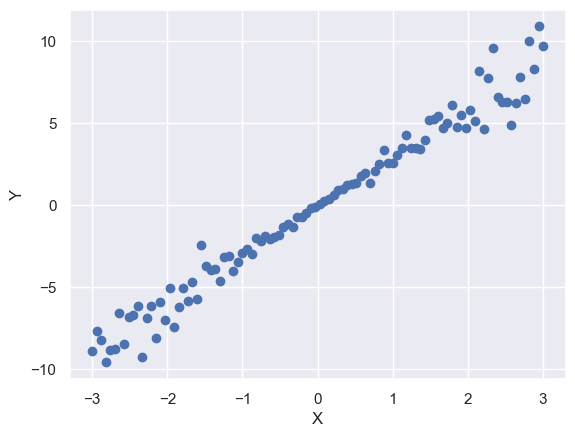

In [2]:
# Creating of the dataset
n_obs = 100
x = np.linspace(-3, 3, n_obs)
X = x[:, np.newaxis]
y = x + x*np.random.normal(2,.5,n_obs)

# Plot our data
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y');

The data we see above is so clear, it is almost too straightforward to directly make some remarks:
* If x increases, then y increases
* If x decreases, then y decreases
* The increase in y is almost always the same
* If we know x, then we'll have a pretty good idea of what y will be

There is one type of mathematical function which also possesses these properties, and simply by looking at the graph it should be obvious which one this would be. Ask yourself the following question: ``If I could draw a line through the data in order to approximate the data, what would it look like?`` 
Exactly! Simply a straight line. It is exactly this that we'll be doing when constructing Simple Linear Regression Models.

## 2.3 Model

### 2.3.1 Model

Like we said before, the Linear Regression Model is based around trying to fit a special type of function as best we can within our data. The function we try to fit is called the **Linear function**. This is a function that posesses the properties we demanded in section 1.2. In 2 dimensions like we displayed above, this function is represented as a straight line. The formula of a linear function is as follows:

$$y = \beta_0 + \beta_1 x $$

The next question we must ask ourselves is how we would like to draw this line. In our figure, we can draw an infinite amound of lines. But which one is the correct one? As we can see in the formula above, there are two constant parameters, $\beta_0$ and $\beta_1$. When we change these, we change how our line is drawn. The algorithm we will use to determine the best values for $\beta_0$ and $\beta_1$ is called the *Ordinary Least Squares Algorithm*. It comes down to the following: *we minimize the distance between our regression function and each datapoint*.

### 2.3.2 Model Estimation

To implement this algorithm, luckily Python gives us a hand. Let's first make a function object:

In [3]:
regressor = LinearRegression()

Yes, it really is as simple as that. Now we've made our Linear Regression object, let's run the OLS algorithm in order to fit the function on our data:

In [4]:
regressor.fit(X, y)

LinearRegression()

And just like that, we've fitted our very first model! 

Now, of course, simply by saying that our model has been run, doesn't magically allow us to predict values for y. Let's take a look at which function we have produced:


In [5]:
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))

Intercept (Beta 0): -0.07057290888195585
Slope (Beta 1): 2.9761748365789655


We can use this information to predict values of y!

##### Question 1: Predict the values for y when x is -2, pi, and 0. 

In [6]:
print(regressor.predict([[-2]]))
print(regressor.predict([[math.pi]]))
print(regressor.predict([[0]]))

def eval_func(x):
    return x * regressor.coef_[0] + regressor.intercept_

print(eval_func(-2))
print(eval_func(math.pi))
print(eval_func(0))

[-6.02292258]
[9.27935609]
[-0.07057291]
-6.022922582039887
9.279356093513325
-0.07057290888195585


Next to predicting values, it might also be interesting to have a graphical representation:

Text(0, 0.5, 'Y')

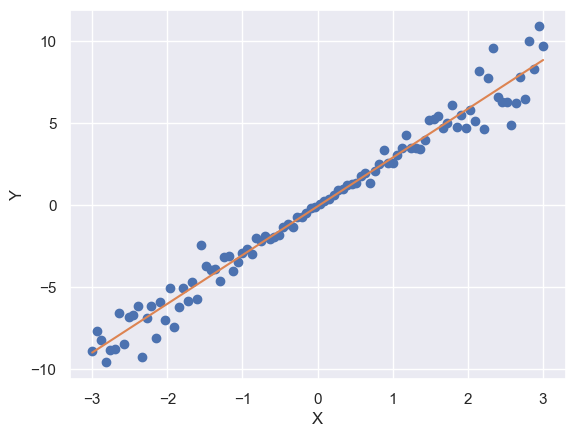

In [7]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(X, y, 'o')
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")

## 2.4 Model Evaluation

Based on the graph we've produced above, it is abundandly clear that our model is fairly good. However, that might not be convincing for everyone. Next to that, in other cases it might maybe not be so clear. As such, we need certain metrics to assess just how good our model exactly is. 

Luckily, scikit-learn helps us here as well. There are 2 main criteria for regression evaluation: The $R^2$ score and the $MSE$.

### 2.4.1 Variational Measure ($R^2$)

The $R^2$ is fairly straightforward, so we will start with that. The $R^2$ represents the percentage of variance in our response variable (y) that is explained by our model. That means in our case; the percentage of variance in y that can be explained by a variance in x. In other words: if I can see that the value of y has changed (relatively to the mean), how much of that change can I attribute to our model or to the changing of x?
The $R^2$ always lies beteen 0 and 1 (between 0 and 100 %). To interpret it, we use the following rules:
- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.

In [8]:
print('The R2 score of the model on the test set is:', regressor.score(X, y))

The R2 score of the model on the test set is: 0.9724775986754324


##### Question 2: Interpret the $R^2$ score. Is our model any good?

Yes. In this case, 97% of our data is explained by our model.

### 2.4.2 Mean Absolute Error

The $MAE$ is is a little bit more intricate, but also gives us in insight in the predictive abilities of our model. That is; assuming our model can predict values of y based on those of x, how good are those predictions? To asses that, we simply calculate the difference between our predicted values and the observed values. The difference between those 2 values is the error we are making when predicting values. To give us an idea of how good our model actually is we add these values up. 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

The $MAE$ is the average difference over the predicted and actual target values. It should be evident that the lower this value is, the better the model fits our data. 

In [9]:
y_pred = regressor.predict(X).reshape(-1, 1)
print('The MAE of the model on the test set is:', mean_absolute_error(y_pred, y))

The MAE of the model on the test set is: 0.6146332388460013


### 2.4.3 Mean Squared Error

The $MSE$ is a very similar to the $MAE$, however offers one distinct advantage: it punishes models with large outliers. These outliers often indicate overfitting and can get lost in the $MAE$. Noticing these faults in our model early is important to make correct conclusions.

$$MSE = \frac{1}{n} \sum^{n}_{i=1} (\text{predicted}_i - \text{true}_i)^2$$

Thus, the $MSE$ is the average squared difference over the predicted and actual target values. Going forwards we will mostly be using this metric to evaluate a model.

In [10]:
print('The MSE of the model on the test set is:', mean_squared_error(y_pred, y))

The MSE of the model on the test set is: 0.7672396385842762


## 2.5 Exercises

##### Question 1: See section 2.3.2
##### Question 2: See section 2.4.1
##### Question 3: In section 2.3.2 we draw the function line by executing the function at the minimum value of X and the maximum value of X. Adapt the function coefficients and report what happens. What happens if Beta 1 is positive? What happends if it is negative? What happens to the function if Beta 1 is equal to 0?
Beta 1 controls the slope of the predicition graph. The higher Beta 1 becomes, the steeper the prediction graph will climb. On the contrary, if Beta 1 decreases the slope will also decrease. The turning point lies at zero, a graph where Beta 1 is zero will be completetly flat.

If Beta 1 becomes negative, the slope will start to go down. The lower Beta 1 is, the steeper down it goes.
##### Question 4: Think of examples in which linear regression will definitely **not** be the way to go. Give 3.
There are plenty of examples where linear regression is not useful. Some examples are:
- When a dataset does not show a linear connection. This can be because it shows an exponential connection or no at all.
- When you are trying to determine a classification of objects instead of predict a continuous value.
- when you are trying to gain insights from a dataset without knowing exactly what you are looking for (e.g. clustering).